In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pickle
sns.set()
pd.set_option('display.max_columns', 126)

In [2]:
data = pd.read_csv('FIFA 2019 Players Data Cleaned.csv')

In [3]:
data.describe()

,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GK,GKReflexes,Release Clause
count,17955.000000,17955.000000,17955.000000,1.795500e+04,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.00000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,1.795500e+04
mean,25.095349,66.228237,71.323197,2.444530e+06,9865.831245,1598.151211,1.113395,2.947480,2.362072,19.649791,71.354219,165.932331,60.379504,60.379504,60.379504,61.525926,61.122473,61.122473,61.122473,61.525926,61.411250,61.411250,61.411250,62.120524,60.610972,60.610972,60.610972,62.120524,60.101197,59.349206,59.349206,59.349206,60.101197,59.450682,58.441158,58.441158,58.441158,59.450682,49.755221,45.583793,52.298079,58.715344,42.927652,55.429852,47.210025,42.869229,52.72225,58.420106,64.628850,64.747146,63.536564,61.809802,63.975383,55.492509,65.121359,63.225118,65.321637,47.131384,55.876859,46.707714,50.009412,53.446227,48.539237,58.639432,47.280479,47.709106,45.666778,16.572598,16.350933,16.189195,16.341743,16.666889,4.539960e+06
std,4.659778,6.921015,6.139378,5.626715e+06,22123.139872,272.568015,0.394708,0.659355,0.755477,15.989539,2.649004,15.593896,9.059026,9.059026,9.059026,9.731538,9.663676,9.663676,9.663676,9.731538,9.611268,9.611268,9.611268,9.119670,8.718091,8.718091,8.718091,9.119670,8.988107,10.021694,10.021694,10.021694,8.988107,9.482737,11.547946,11.547946,11.547946,9.482737,18.327010,19.485485,17.338383,14.654139,17.662426,18.874725,18.360765,17.456036,15.28494,16.639562,14.906957,14.626527,14.739581,9.013992,14.127337,17.189846,11.812694,15.859544,12.534772,19.222000,17.327888,20.666229,19.491419,14.090548,15.665315,11.408258,19.849216,21.623694,21.247143,17.641066,16.855102,16.447462,16.969481,17.895512,1.089268e+07
min,16.000000,46.000000,48.000000,1.000000e+04,1000.000000,731.000000,1.000000,1.000000,1.000000,1.000000,61.000000,110.000000,33.000000,33.000000,33.000000,27.000000,29.000000,29.000000,29.000000,27.000000,29.000000,29.000000,29.000000,29.000000,32.000000,32.000000,32.000000,29.000000,32.000000,30.000000,30.000000,30.000000,32.000000,31.000000,27.000000,27.000000,27.000000,31.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.00000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.300000e+04
25%,21.000000,62.000000,67.000000,3.250000e+05,1000.000000,1457.500000,1.000000,3.000000,2.000000,8.000000,69.000000,154.000000,54.000000,54.000000,54.000000,56.000000,55.000000,55.000000,55.000000,56.000000,56.000000,56.000000,56.000000,57.000000,55.000000,55.000000,55.000000,57.000000,54.000000,52.000

In [4]:
data.shape

(17955, 83)

In [5]:
data.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GK,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,2004-07-01,2021-01-01,67,159,90,90,90,94,95,95,95,94,95,95,95,93,86,86,86,93,66,63,63,63,66,61,49,49,49,61,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,2018-07-10,2022-01-01,74,183,94,94,94,92,93,93,93,92,91,91,91,91,84,84,84,91,68,64,64,64,68,64,56,56,56,64,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,2017-08-03,2022-01-01,69,150,87,87,87,92,92,92,92,92,92,92,92,91,84,84,84,91,68,63,63,63,68,63,50,50,50,63,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,2011-07-01,2020-01-01,76,168,76,76,76,73,74,74,74,73,74,74,74,75,78,78,78,75,69,66,66,66,69,63,52,52,52,63,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,2015-08-30,2023-01-01,71,154,85,85,85,90,90,90,90,90,91,91,91,91,90,90,90,91,80,80,80,80,80,76,69,69,69,76,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0


I'm dropping name feature because irrelevant for model. Also I'm going drop special feature because i don't know about it i searched but didn't find anything and also i checked it is highly correlated to predictor features.

In [6]:
data.drop(['Name', 'Special'], inplace=True, axis=1)

In [7]:
#cnverting some date features dtypes
data['Joined'] = pd.to_datetime(data['Joined'])
data['Contract Valid Until'] = pd.to_datetime(data['Contract Valid Until'])

In [8]:
data.head()

,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GK,GKReflexes,Release Clause
0,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,2004-07-01,2021-01-01,67,159,90,90,90,94,95,95,95,94,95,95,95,93,86,86,86,93,66,63,63,63,66,61,49,49,49,61,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,2018-07-10,2022-01-01,74,183,94,94,94,92,93,93,93,92,91,91,91,91,84,84,84,91,68,64,64,64,68,64,56,56,56,64,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,2017-08-03,2022-01-01,69,150,87,87,87,92,92,92,92,92,92,92,92,91,84,84,84,91,68,63,63,63,68,63,50,50,50,63,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,2011-07-01,2020-01-01,76,168,76,76,76,73,74,74,74,73,74,74,74,75,78,78,78,75,69,66,66,66,69,63,52,52,52,63,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,2015-08-30,2023-01-01,71,154,85,85,85,90,90,90,90,90,91,91,91,91,90,90,90,91,80,80,80,80,80,76,69,69,69,76,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0


In [9]:
datetime_features = ['Joined', 'Contract Valid Until']
categorical_features = [col for col in data.columns if data[col].dtypes == 'O']
numerical_features = [col for col in data.columns if data[col].dtypes != 'O' and col not in datetime_features]

## Feature Engineering
Some categorical features have large number of categories. If perform one hot encoding it will a lot columns. label encoding also create a lot of information in feature. <br>
So what I'm going to do is I will group them into categories to reduce the categories. I will group them on the basis of average overall ratings of that club players.

In [10]:
data[categorical_features].head()

,Nationality,Club,Preferred Foot,Work Rate,Body Type,Real Face,Position
0,Argentina,FC Barcelona,Left,Medium/ Medium,Messi,Yes,RF
1,Portugal,Juventus,Right,High/ Low,C. Ronaldo,Yes,ST
2,Brazil,Paris Saint-Germain,Right,High/ Medium,Neymar,Yes,LW
3,Spain,Manchester United,Right,Medium/ Medium,Lean,Yes,GK
4,Belgium,Manchester City,Right,High/ High,Normal,Yes,RCM


### Nationality
**Nationality have 163 categories<br>**

In [11]:
def get_nati_class(value):
    if value >= 80:
        return 'Class A'
    elif value >= 70 and value < 80:
        return 'Class B'
    elif value >= 60 and value < 70:
        return 'Class C'
    elif value >= 50 and value < 60:
        return 'Class D'
    elif value < 50:
        return 'Class E'

In [12]:
countries_classes = {}
for nation in data['Nationality'].unique():
    a = np.average(data[data['Nationality'] == nation]['Overall'])
    countries_classes[nation] = get_nati_class(a)

In [13]:
data['Nationality'].replace(countries_classes, inplace=True)

### Club

In [14]:
def get_club_class(value):
    if value >= 80:
        return 'Club Class A'
    elif value >= 70 and value < 80:
        return 'Club Class B'
    elif value >= 60 and value < 70:
        return 'Club Class C'
    elif value >= 50 and value < 60:
        return 'Club Class D'
    elif value < 50:
        return 'Club Class E'

In [15]:
clubs_class = {}
for club in data['Club'].unique():
    avg = np.average(data[data['Club'] == club]['Overall'])
    clubs_class[club] = get_club_class(avg)

In [16]:
data['Club'].replace(clubs_class, inplace=True)

## Checking Correlation and removeing features

### Variance Inflation Factor Function

In [17]:
def vif_scores(df):
    VIF_Scores = pd.DataFrame()
    VIF_Scores["Independent Features"] = df.columns
    VIF_Scores["VIF Scores"] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return VIF_Scores

In [18]:
data[numerical_features].corr()

,Age,Overall,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves,Jersey Number,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GK,GKReflexes,Release Clause
Age,1.000000,0.455873,-0.251732,0.078315,0.144900,0.253222,0.060855,0.029684,-0.241446,0.081534,0.229258,0.318904,0.318904,0.318904,0.240856,0.266571,0.266571,0.266571,0.240856,0.275375,0.275375,0.275375,0.263934,0.380306,0.380306,0.380306,0.263934,0.356718,0.397873,0.397873,0.397873,0.356718,0.338851,0.356311,0.356311,0.356311,0.338851,0.132831,0.071313,0.150119,0.136213,0.144710,0.013262,0.145927,0.195865,0.184408,0.088019,-0.154292,-0.146850,-0.015633,0.455811,-0.087980,0.159681,0.181851,0.103731,0.336355,0.157554,0.268011,0.199709,0.086277,0.191033,0.141234,0.393296,0.144453,0.121205,0.104263,0.099745,0.104931,0.103323,0.114874,0.102086,0.067937
Overall,0.455873,1.000000,0.660165,0.631848,0.576308,0.501593,0.211314,0.415862,-0.218680,0.040173,0.155679,0.674243,0.674243,0.674243,0.632266,0.661990,0.661990,0.661990,0.632266,0.675204,0.675204,0.675204,0.680583,0.772251,0.772251,0.772251,0.680583,0.641297,0.630714,0.630714,0.630714,0.641297,0.576127,0.470177,0.470177,0.470177,0.576127,0.395478,0.333341,0.341750,0.503563,0.391818,0.373148,0.420362,0.398056,0.484433,0.461451,0.196810,0.210874,0.265486,0.851320,0.102871,0.442653,0.265079,0.366315,0.350811,0.421646,0.396533,0.321839,0.357200,0.500637,0.341827,0.730632,0.286980,0.252690,0.222496,-0.025412,-0.024674,-0.028938,-0.016901,-0.022904,0.616753
Potential,-0.251732,0.660165,1.000000,0.579608,0.489097,0.374765,0.160733,0.354601,-0.010756,-0.007629,-0.005506,0.433486,0.433486,0.433486,0.442683,0.458112,0.458112,0.458112,0.442683,0.468463,0.468463,0.468463,0.470418,0.492585,0.492585,0.492585,0.470418,0.374669,0.347900,0.347900,0.347900,0.374669,0.327089,0.223853,0.223853,0.223853,0.327089,0.245380,0.242538,0.200301,0.368269,0.253950,0.314023,0.278713,0.230048,0.320191,0.353721,0.233436,0.235480,0.221204,0.513596,0.137193,0.287718,0.107069,0.200235,0.074445,0.265741,0.169922,0.153905,0.244063,0.346962,0.223666,0.440834,0.161856,0.142465,0.127772,-0.051669,-0.053089,-0.057399,-0.050726,-0.051904,0.574546
Value,0.078315,0.631848,0.579608,1.000000,0.858086,0.656250,0.166517,0.317566,-0.098283,0.003709,0.047428,0.453081,0.453081,0.453081,0.439211,0.460859,0.460859,0.460859,0.439211,0.465340,0.465340,0.465340,0.464383,0.494740,0.494740,0.494740,0.464383,0.351001,0.329952,0.329952,0.329952,0.351001,0.302391,0.213286,0.213286,0.213286,0.302391,0.251510,0.258202,0.186134,0.330014,0.290242,0.273048,0.288774,0.267730,0.304771,0.310490,0.171599,0.173556,0.194965,0.545215,0.114323,0.283241,0.124250,0.212491,0.129678,0.281702,0.186118,0.141686,0.260540,0.360084,0.241485,0.454789,0.135229,0.109189,0.088463,-0.027858,-0.028186,-0.030159,-0.027035,-0.027819,0.992556
Wage,0.144900,0.576308,0.489097,0.858086,1.000000,0.671628,0.141944,0.264655,-0.089701,0.020796,0.066378,0.404992,0.404992,0.404992,0.385580,0.406131,0.406131,0.406131,0.385580,0.410440,0.410440,0.410440,0.408737,0.449515,0.449515,0.449515,0.408737,0.340303,0.325695,0.325695,0.325695,0.340303,0.300344,0.229782,0.229782,0.229782,0.300344,0.234366,0.218612,0.189654,0.298713,0.259045,0.237863,0.260814,0.238046,0.279039,0.278924,0.125801,0.131015,0.156718,0.499925,0.089319,0.259986,0.129445,0.179140,0.140172,0.250740,0.196104,0.158517,0.227625,0.317289,0.224675,0.423673,0.147006,0.127185,0.111917,-0.024800,-0.024387,-0.027502,-0.024585,-0.025210,0.850849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [19]:
insignificant_features = ['Age', 'Jersey Number', 'Height', 'Weight', 'SlidingTackle',
                          'GKDiving', 'GKHandling', 'GKKicking', 'GKReflexes']

In [20]:
data.drop(insignificant_features, axis=1, inplace=True)

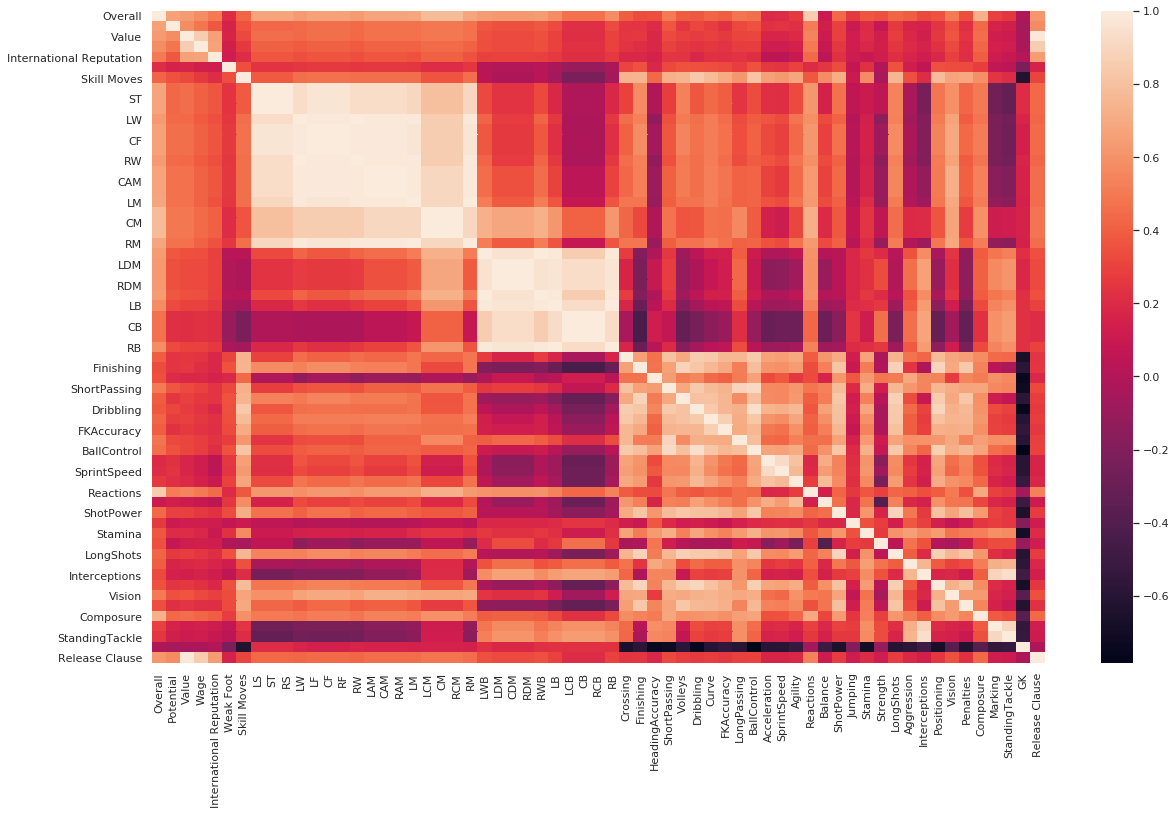

In [21]:
numerical_features = [col for col in data.columns if data[col].dtypes != 'O' and col not in datetime_features]
plt.figure(figsize=[20,12])
sns.heatmap(data[numerical_features].corr())
plt.show()

We have very high multicolinearity in positions rating features.<br>
## Transforming  Positions Feature
We also have one position categorical feature which show each player position.<br>
so how I'll reduce multicolinearity is I will replaces each player position in categorical feature with that position value from numerical feature. And rename final feature to position ratings<br>
e.g, for position RCB I'll replace with value from RCB column
**Creating Extra features**
I will create a feature with above ones.
<br>
<br>
Average player position as **Avg position rtg**.
<br>
<br>
I will not create max rating because that already player have in form of position because they are in their best position.

In [22]:
position_features = data['Position'].unique()
for fea in position_features:
    data.loc[data['Position'] == fea, 'Position'] = data.loc[data['Position'] == fea][fea]

In [23]:
data.rename(columns={'Position':'Positions Ratings'}, inplace=True)
data['Positions Ratings'] = data['Positions Ratings'].astype('int64')

## Creating Extra feature

In [24]:
data['Avg position rtg'] = data[position_features].mean(axis=1).round(0)

## Droping all other columns
Now I'll drop all multicolinear positions features.

In [25]:
data.drop(position_features, axis=1, inplace=True)
data.head()

,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Positions Ratings,Joined,Contract Valid Until,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,Release Clause,Avg position rtg
0,Class C,94,94,Club Class B,110500000.0,565000.0,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,95,2004-07-01,2021-01-01,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,226500000.0,77.0
1,Class B,94,94,Club Class A,77000000.0,405000.0,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,94,2018-07-10,2022-01-01,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,127100000.0,77.0
2,Class B,92,93,Club Class B,118500000.0,290000.0,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,92,2017-08-03,2022-01-01,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,228100000.0,76.0
3,Class C,91,93,Club Class B,72000000.0,260000.0,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,88,2011-07-01,2020-01-01,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,138600000.0,71.0
4,Class C,91,92,Club Class B,102000000.0,355000.0,Right,4.0,5.0,4.0,High/ High,Normal,Yes,90,2015-08-30,2023-01-01,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,196400000.0,81.0


In [26]:
data.shape

(17955, 46)

total numerical features 38


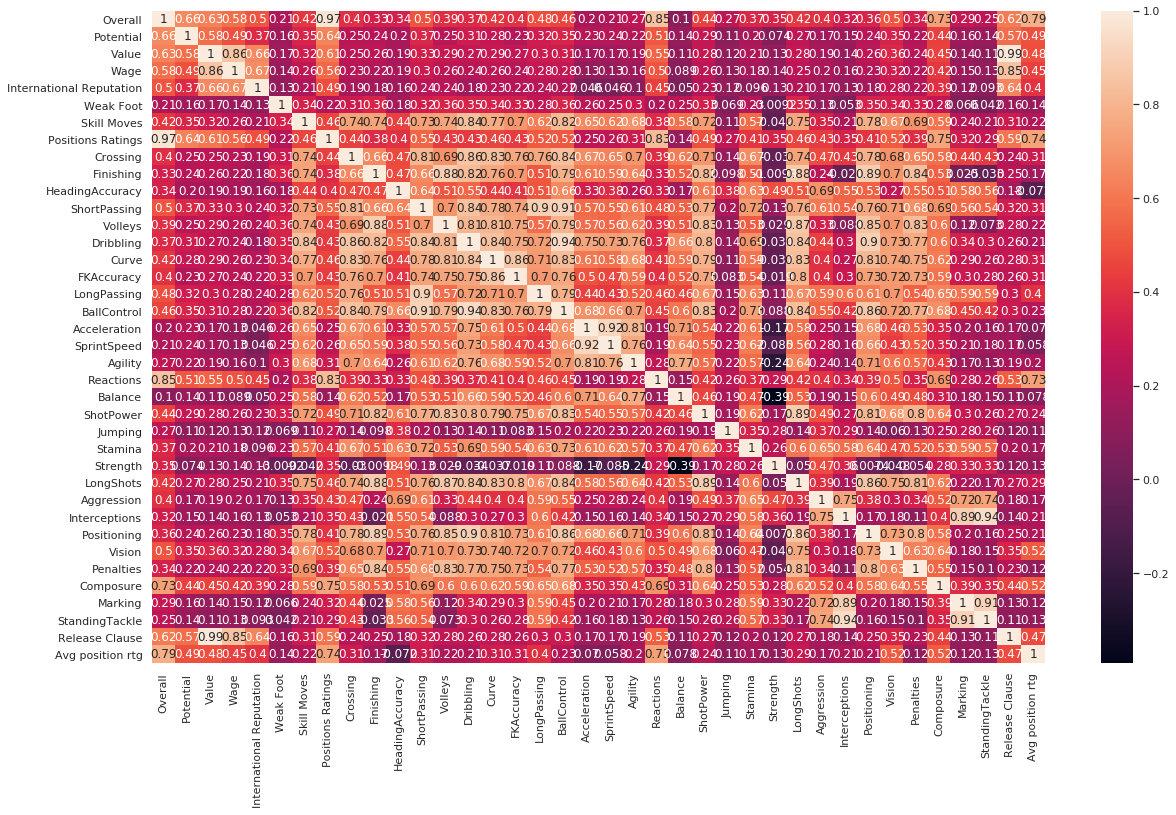

In [27]:
numerical_features = [col for col in data.columns if data[col].dtypes != 'O' and col not in datetime_features]
print('total numerical features', len(numerical_features))
plt.figure(figsize=[20,12])
sns.heatmap(data[numerical_features].corr(), annot=True)
plt.show()

**Some correlated features are similar so I will combine them.**
1. Skill moves represent all the skills of player and it is correlated to skill features of player so i'll combine them to one feature to remove multicolinearity.

In [28]:
#rescaling weak foot rating to same scale as other skills.
data['Weak Foot'] = (data['Weak Foot']/5) * 100

In [29]:
skills = ['Weak Foot', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 
          'Curve', 'FKAccuracy', 'LongPassing', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 
          'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
          'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
         'Marking', 'StandingTackle']
data[['Skill Moves'] + skills].head()

,Skill Moves,Weak Foot,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle
0,4.0,80.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0
1,5.0,80.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0
2,5.0,100.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0
3,1.0,60.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0
4,4.0,100.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0


skills moves is the result of all players skills but in range between 0 to 5 and all skills in range 0 to 100.<br>
I'll replace current skills moves features values with new one.

In [30]:
data['Skill Moves'] = data[skills].mean(axis=1).round(0)
data.drop(skills, inplace=True, axis=1)

In [31]:
data.drop('Positions Ratings', inplace=True, axis=1)

In [32]:
data.drop('Avg position rtg', inplace=True, axis=1)

total numerical features 7


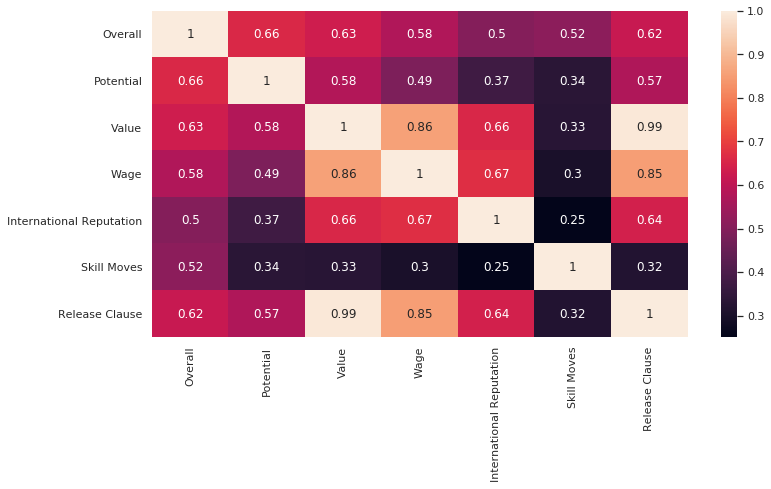

In [33]:
numerical_features = [col for col in data.columns if data[col].dtypes != 'O' and col not in datetime_features]
print('total numerical features', len(numerical_features))
plt.figure(figsize=[12,6])
sns.heatmap(data[numerical_features].corr(), annot=True)
plt.show()

## Perform Encoding on Categorical data

In [34]:
categorical_features = [col for col in data.columns if data[col].dtypes == 'O']
data[categorical_features].head()

,Nationality,Club,Preferred Foot,Work Rate,Body Type,Real Face
0,Class C,Club Class B,Left,Medium/ Medium,Messi,Yes
1,Class B,Club Class A,Right,High/ Low,C. Ronaldo,Yes
2,Class B,Club Class B,Right,High/ Medium,Neymar,Yes
3,Class C,Club Class B,Right,Medium/ Medium,Lean,Yes
4,Class C,Club Class B,Right,High/ High,Normal,Yes


### Label Encoding

In [35]:
lbl = LabelEncoder()

In [36]:
data['Preferred Foot'] = lbl.fit_transform(data['Preferred Foot'])
data['Real Face'] = lbl.fit_transform(data['Real Face'])

### Get Dummies

In [37]:
no_dummy_data = pd.get_dummies(data, drop_first=True)

## Convert DateTime features to numerical

In [38]:
no_dummy_data['Joined Day'] = no_dummy_data['Joined'].dt.day
no_dummy_data['Joined Month'] = no_dummy_data['Joined'].dt.month
no_dummy_data['Joined Year'] = no_dummy_data['Joined'].dt.year

#contract valid

no_dummy_data['Contract Expire Day'] = no_dummy_data['Contract Valid Until'].dt.day
no_dummy_data['Contract Expire Month'] = no_dummy_data['Contract Valid Until'].dt.month
no_dummy_data['Contract Expire Year'] = no_dummy_data['Contract Valid Until'].dt.year

In [39]:
no_dummy_data.drop(['Joined', 'Contract Valid Until'], axis=1, inplace=True)

In [40]:
no_dummy_data

,Overall,Potential,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Real Face,Release Clause,Nationality_Class C,Nationality_Class D,Club_Club Class B,Club_Club Class C,Club_Club Class D,Work Rate_High/ Low,Work Rate_High/ Medium,Work Rate_Low/ High,Work Rate_Low/ Low,Work Rate_Low/ Medium,Work Rate_Medium/ High,Work Rate_Medium/ Low,Work Rate_Medium/ Medium,Body Type_C. Ronaldo,Body Type_Courtois,Body Type_Lean,Body Type_Messi,Body Type_Neymar,Body Type_Normal,Body Type_Shaqiri,Body Type_Stocky,Joined Day,Joined Month,Joined Year,Contract Expire Day,Contract Expire Month,Contract Expire Year
0,94,94,110500000.0,565000.0,0,5.0,80.0,1,226500000.0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,7,2004,1,1,2021
1,94,94,77000000.0,405000.0,1,5.0,80.0,1,127100000.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,10,7,2018,1,1,2022
2,92,93,118500000.0,290000.0,1,5.0,78.0,1,228100000.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3,8,2017,1,1,2022
3,91,93,72000000.0,260000.0,1,4.0,39.0,1,138600000.0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,7,2011,1,1,2020
4,91,92,102000000.0,355000.0,1,4.0,82.0,1,196400000.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,30,8,2015,1,1,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17950,47,65,60000.0,1000.0,1,1.0,44.0,0,143000.0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,3,5,2017,1,1,2019
17951,47,63,60000.0,1000.0,1,1.0,37.0,0,113000.0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,19,3,2018,1,1,2020
17952,47,67,60000.0,1000.0,1,1.0,42.0,0,165000.0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,7,2017,1,1,2021
17953,47,66,60000.0,1000.0,1,1.0,43.0,0,143000.0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,24,4,2018,1,1,2019


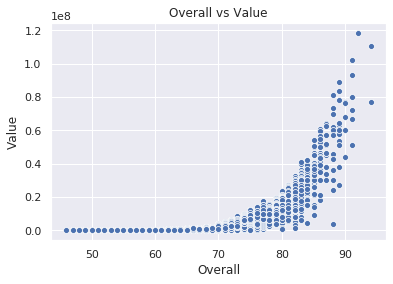

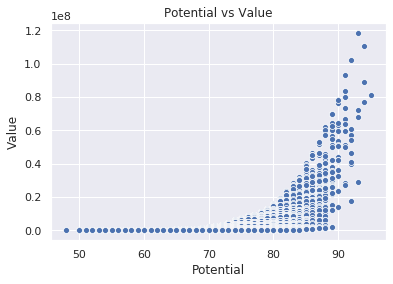

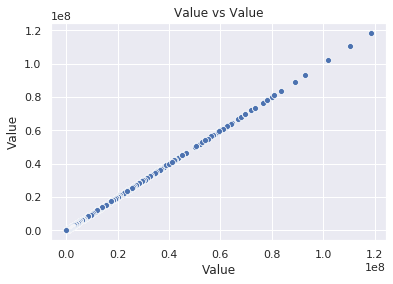

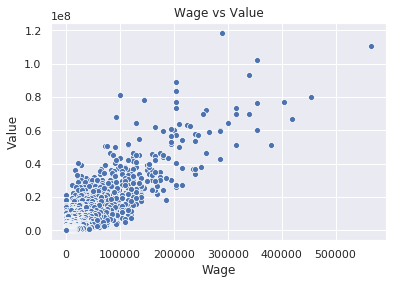

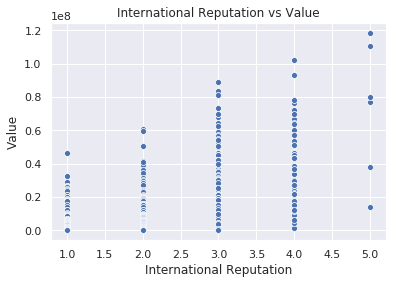

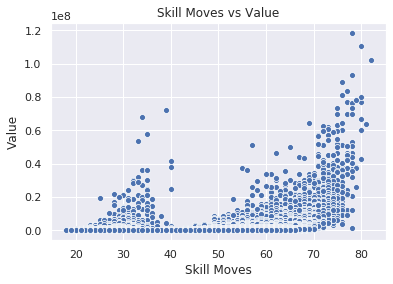

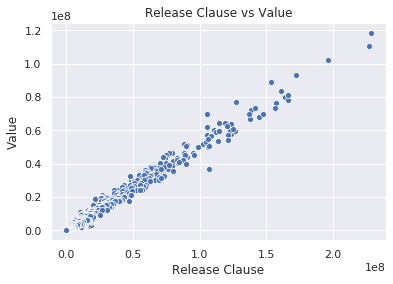

In [41]:
for col in numerical_features:
    sns.scatterplot(x=data[col], y=data['Value'])
    plt.title(f'{col} vs Value')
    plt.show()

# Feature selection

## Numerical features

### Embedded Method
In embedded technique we use lasso and ridge for feature selection.

In [42]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [43]:
x=no_dummy_data.drop('Value', axis=1)
y=no_dummy_data['Value']
lasso_model = SelectFromModel(Lasso(max_iter=3000, tol=0.01))

In [44]:
lasso_model.fit(x, y)

SelectFromModel(estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                                max_iter=3000, normalize=False, positive=False,
                                precompute=False, random_state=None,
                                selection='cyclic', tol=0.01,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [45]:
lasso_sel = x.columns[lasso_model.get_support()]

In [46]:
print(f'''Lasso Model
Total features: {x.shape[1]}
Selected featrues: {len(lasso_sel)}
Features shrink to 0: {np.sum(lasso_model.estimator_.coef_ == 0)}''')

Lasso Model
Total features: 35
Selected featrues: 35
Features shrink to 0: 0


In [47]:
lasso_sel.tolist()

['Overall',
 'Potential',
 'Wage',
 'Preferred Foot',
 'International Reputation',
 'Skill Moves',
 'Real Face',
 'Release Clause',
 'Nationality_Class C',
 'Nationality_Class D',
 'Club_Club Class B',
 'Club_Club Class C',
 'Club_Club Class D',
 'Work Rate_High/ Low',
 'Work Rate_High/ Medium',
 'Work Rate_Low/ High',
 'Work Rate_Low/ Low',
 'Work Rate_Low/ Medium',
 'Work Rate_Medium/ High',
 'Work Rate_Medium/ Low',
 'Work Rate_Medium/ Medium',
 'Body Type_C. Ronaldo',
 'Body Type_Courtois',
 'Body Type_Lean',
 'Body Type_Messi',
 'Body Type_Neymar',
 'Body Type_Normal',
 'Body Type_Shaqiri',
 'Body Type_Stocky',
 'Joined Day',
 'Joined Month',
 'Joined Year',
 'Contract Expire Day',
 'Contract Expire Month',
 'Contract Expire Year']

### Wrapper Methods

In [48]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from boruta import boruta_py
rf_model = GradientBoostingRegressor()
feature_selector = boruta_py.BorutaPy(rf_model, n_estimators='auto', verbose=2)

In [49]:
feature_selector.fit(np.array(x), np.array(y))

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	35
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	35
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	35
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	35
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	35
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	35
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	35
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	6
Tentative: 	3
Rejected: 	26
Iteration: 	9 / 100
Confirmed: 	6
Tentative: 	3
Rejected: 	26
Iteration: 	10 / 100
Confirmed: 	6
Tentative: 	3
Rejected: 	26
Iteration: 	11 / 100
Confirmed: 	6
Tentative: 	3
Rejected: 	26
Iteration: 	12 / 100
Confirmed: 	6
Tentative: 	3
Rejected: 	26
Iteration: 	13 / 100
Confirmed: 	6
Tentative: 	3
Rejected: 	26
Iteration: 	14 / 100
Confirmed: 	6
Tentative: 	3
Rejected: 	26
Iteration: 	15 / 100
Confirmed: 	6
Tentative: 	3
Rejected: 	26
Iteration: 	16 / 100
Confirmed: 	6
Tentative: 	3
Rejected: 	26
I

BorutaPy(alpha=0.05,
         estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                             criterion='friedman_mse',
                                             init=None, learning_rate=0.1,
                                             loss='ls', max_depth=3,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=141,
                                             n_iter_no_change=None,
                                             presort='deprecated',
                 

In [50]:
feature_selector.support_

array([ True,  True,  True, False, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False])

In [57]:
x.columns[feature_selector.support_]

Index(['Overall', 'Potential', 'Wage', 'Skill Moves', 'Release Clause',
       'Contract Expire Month'],
      dtype='object')

In [55]:
#selecting some extra features because wrapper method prone to overfitting
final_selected_data = no_dummy_data[['Overall', 'Potential','Wage','International Reputation','Skill Moves','Value', 
                                     'Release Clause','Club_Club Class C','Club_Club Class B','Contract Expire Year']]

In [56]:
final_selected_data

,Overall,Potential,Wage,International Reputation,Skill Moves,Value,Release Clause,Club_Club Class C,Club_Club Class B,Contract Expire Year
0,94,94,565000.0,5.0,80.0,110500000.0,226500000.0,0,1,2021
1,94,94,405000.0,5.0,80.0,77000000.0,127100000.0,0,0,2022
2,92,93,290000.0,5.0,78.0,118500000.0,228100000.0,0,1,2022
3,91,93,260000.0,4.0,39.0,72000000.0,138600000.0,0,1,2020
4,91,92,355000.0,4.0,82.0,102000000.0,196400000.0,0,1,2023
...,...,...,...,...,...,...,...,...,...,...
17950,47,65,1000.0,1.0,44.0,60000.0,143000.0,0,0,2019
17951,47,63,1000.0,1.0,37.0,60000.0,113000.0,0,0,2020
17952,47,67,1000.0,1.0,42.0,60000.0,165000.0,0,0,2021
17953,47,66,1000.0,1.0,43.0,60000.0,143000.0,0,0,2019


## Scaling

In [58]:
min_scale = MinMaxScaler()

In [59]:
dataset = min_scale.fit_transform(final_selected_data)

In [60]:
dataset = pd.DataFrame(dataset, columns=final_selected_data.columns)

In [61]:
dataset

,Overall,Potential,Wage,International Reputation,Skill Moves,Value,Release Clause,Club_Club Class C,Club_Club Class B,Contract Expire Year
0,1.000000,0.978723,1.000000,1.00,0.968750,0.932484,0.992985,0.0,1.0,0.375
1,1.000000,0.978723,0.716312,1.00,0.968750,0.649759,0.557187,0.0,0.0,0.500
2,0.958333,0.957447,0.512411,1.00,0.937500,1.000000,1.000000,0.0,1.0,0.500
3,0.937500,0.957447,0.459220,0.75,0.328125,0.607562,0.607606,0.0,1.0,0.250
4,0.937500,0.936170,0.627660,0.75,1.000000,0.860748,0.861018,0.0,1.0,0.625
...,...,...,...,...,...,...,...,...,...,...
17950,0.020833,0.361702,0.000000,0.00,0.406250,0.000422,0.000570,0.0,0.0,0.125
17951,0.020833,0.319149,0.000000,0.00,0.296875,0.000422,0.000438,0.0,0.0,0.250
17952,0.020833,0.404255,0.000000,0.00,0.375000,0.000422,0.000666,0.0,0.0,0.375
17953,0.020833,0.382979,0.000000,0.00,0.390625,0.000422,0.000570,0.0,0.0,0.125


In [62]:
pickle.dump(min_scale, open('Min_max_scale_object.pkl', 'wb'))

In [63]:
dataset.to_csv('Final_scaled_data_modeling.csv', index=False)